In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Andrey\Python\ML\ML GosNIIAS\Labs\solutions\Lab 3\train.csv")
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
from sklearn.model_selection import train_test_split

data = data.drop(columns=["Id"])

y = data["SalePrice"]
X = data.drop(columns=["SalePrice"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

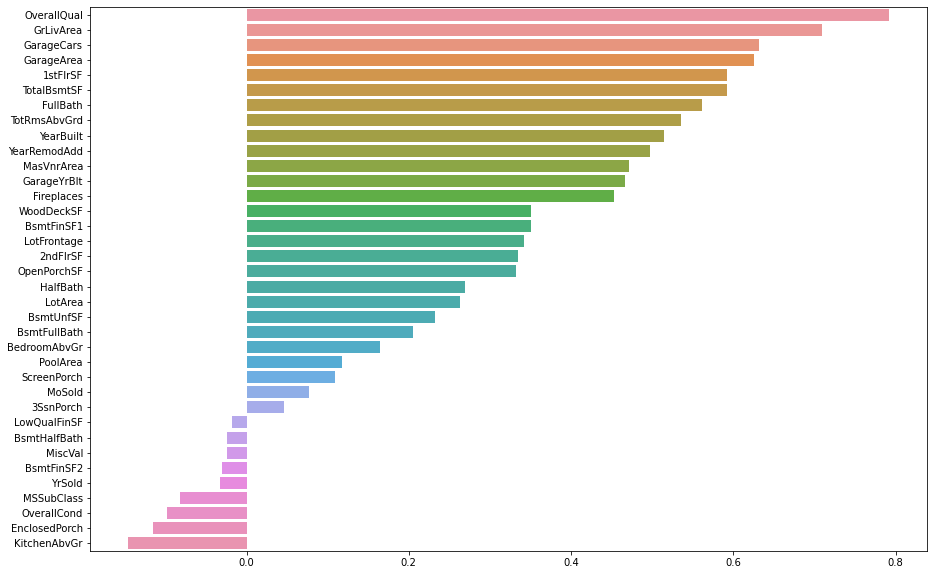

In [4]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

correlations = {
    feature: np.corrcoef(X_train[feature], y_train)[0][1]
    for feature in numeric_features
}
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
features_order = [x[0] for x in sorted_correlations]
correlations = [x[1] for x in sorted_correlations]

plot = sns.barplot(y=features_order, x=correlations)
plot.figure.set_size_inches(15, 10)

**Задание:** Обучите линейную регрессию (LinearRegression, Ridge, Lasso) на числовых признаках из нашего датасета

In [5]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 1029496516.9834
Train MSE = 1269590472.7712


**Задание:** Определите RMSE через функцию sklearn.metrics.make_scorer

In [6]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [7]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
y_train_pred = model.predict(X_train[numeric_features])

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 32085.7681
Train RMSE = 35631.3131


In [8]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train[numeric_features], y_train, cv=10, scoring=rmse_scorer)
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV RMSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -38825.3172
	-45278.9230
	-31405.3380
	-33890.1048
	-73848.3061
	-24142.7915
	-45523.7066
	-52861.2908
	-26094.3376
	-29693.5005
Mean CV RMSE = 40156.3616


In [9]:
def show_weights(features, weights, scales):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()

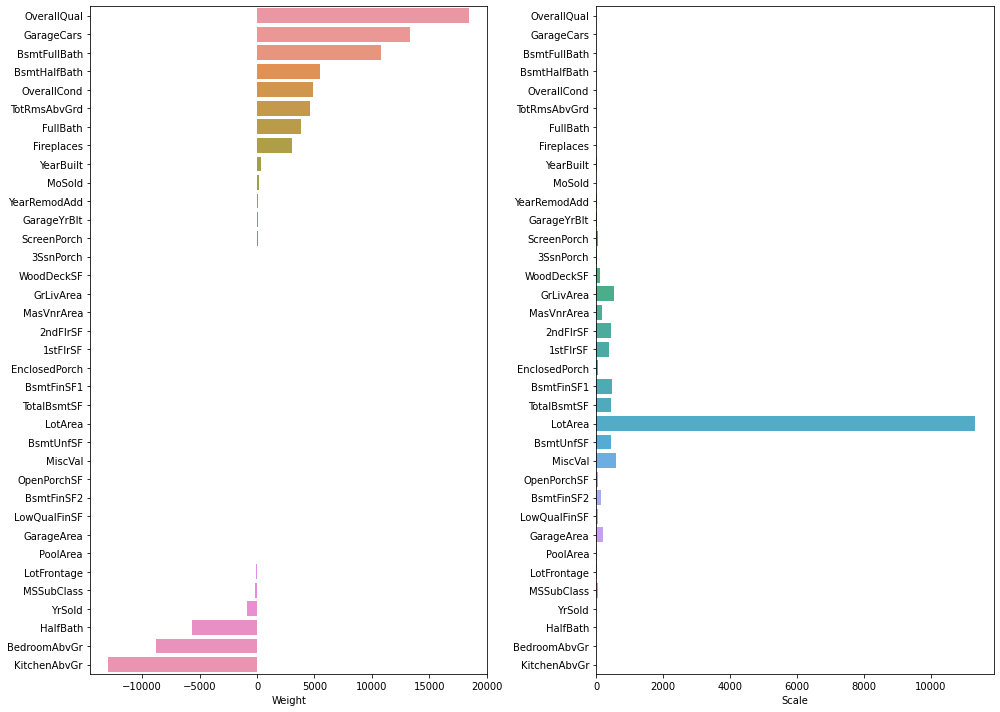

In [10]:
show_weights(numeric_features, model.coef_, X_train[numeric_features].std())

**Задание:** Отмасштабируйте признаки перед обучением модели, воспользуясь трансформером StandardScaler

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 32085.3150
Train RMSE = 35631.2160


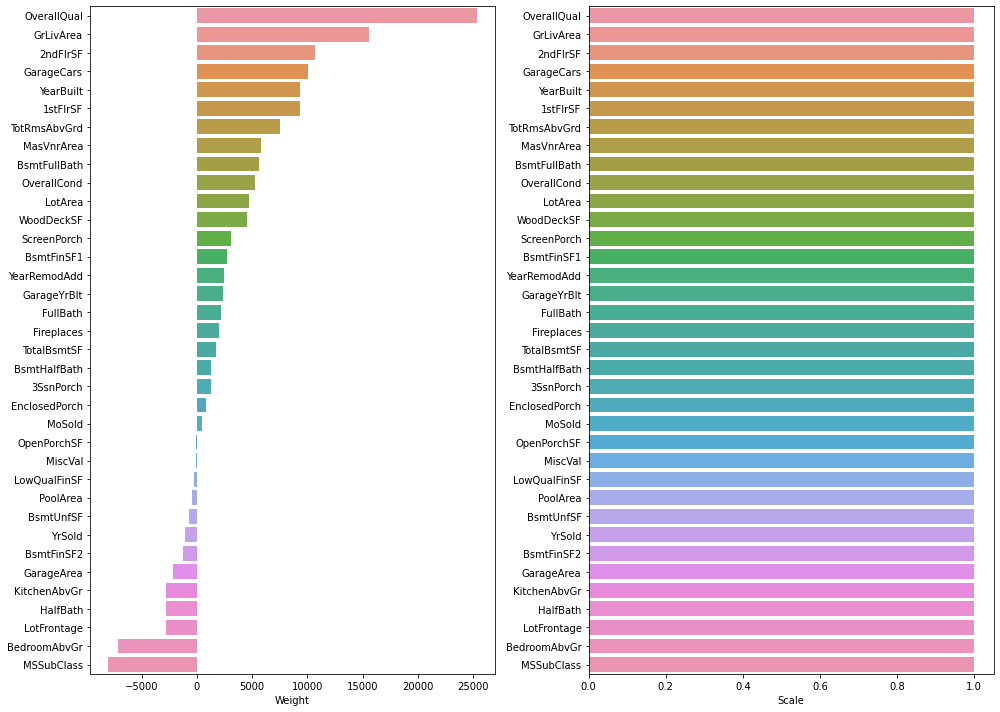

In [12]:
scales = pd.Series(data=X_train_scaled.std(axis=0), index=numeric_features)
show_weights(numeric_features, model.coef_, scales)

**Задание:** Подберите коэффициент регуляризации alpha, воспользуясь GridSearchCV

Best alpha = 297.6351


Text(0, 0.5, 'CV score')

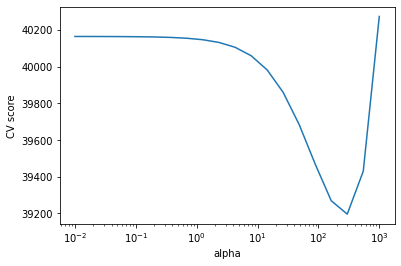

In [13]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-2, 3, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=rmse_scorer, cv=10)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

**Задание:** Обучите линейную регрессию (LinearRegression, Ridge, Lasso) с подобранным коэффициентом регуляризации на числовых признаках из нашего датасета, воспользуясь классом Pipeline (не забывать про мастабирование признаков через StandardScaler)

In [14]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE = %.4f" % rmse(y_test, y_pred))


Test RMSE = 31703.3590


In [15]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

In [16]:
X_train[categorical].sample(5)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1422,RM,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
771,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,Detchd,Unf,TA,TA,Y,NotGiven,NotGiven,NotGiven,COD,Normal
255,RL,Pave,NotGiven,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,BuiltIn,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
549,FV,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,BuiltIn,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal
374,RL,Pave,NotGiven,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,BuiltIn,Fin,TA,TA,Y,NotGiven,NotGiven,NotGiven,WD,Normal


**Задание:** Закодируйте категориальные признаки числами с помощью OneHotEncoder и обучите модели на всех признаках

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 26282.2271


In [18]:
print("Size before OneHot:", X_train.shape)
print("Size after OneHot:", column_transformer.transform(X_train).shape)

Size before OneHot: (1022, 79)
Size after OneHot: (1022, 294)


In [19]:
from sklearn.linear_model import Lasso

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

lasso_pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso())
])

model = lasso_pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE = %.4f" % rmse(y_test, y_pred))

RMSE = 26468.4015


D:\Program Files (x86)\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5769644156.361511, tolerance: 663740509.674582
  model = cd_fast.sparse_enet_coordinate_descent(


In [20]:
ridge_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
lasso_zeros = np.sum(lasso_pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Ridge:", ridge_zeros)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Ridge: 0
Zero weights in Lasso: 29


**Задание:** Подберите коэффициент регуляризации для всех моделей, воспользуясь GridSearchCV

In [21]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 25961.3310


In [22]:
lasso_zeros = np.sum(pipeline.steps[-1][-1].coef_ == 0)
print("Zero weights in Lasso:", lasso_zeros)

Zero weights in Lasso: 221


<AxesSubplot:xlabel='SalePrice'>

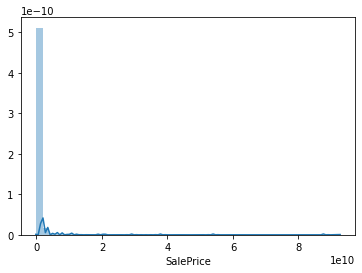

In [23]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)

**Задание:** Выбросите из обучающей выборки примеры, остаток у которых больше 0.95-квантили и переобучите модели 

In [24]:
mask = (error < np.quantile(error, 0.95))

In [25]:
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Lasso(best_alpha))
])

model = pipeline.fit(X_train[mask], y_train[mask])
y_pred = model.predict(X_test)
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 25391.0238


In [26]:
X_train = X_train[mask]
y_train = y_train[mask]

<AxesSubplot:xlabel='SalePrice'>

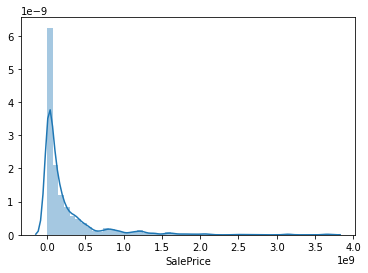

In [27]:
error = (y_train - model.predict(X_train)) ** 2
sns.distplot(error)